In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

import seaborn 

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
def kmeans(df, k):
    k_means=KMeans(n_clusters=k,random_state=42)
    k_means.fit(df.iloc[:,0:2])
    df['KMeans_labels']=k_means.labels_
    # Plotting resulting clusters
    fg = seaborn.FacetGrid(data=df, hue='KMeans_labels', aspect=1.61)
    fg.map(plt.scatter, 'x', 'y').add_legend()

    
    

In [3]:
def hierarchial_clustering(df, k):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean')
    model.fit(df.iloc[:,0:2])
    df['ac']=model.labels_
    # Plotting resulting clusters
    fg = seaborn.FacetGrid(data=df, hue='ac', aspect=1.61)
    fg.map(plt.scatter, 'x', 'y').add_legend()


In [4]:
# dbscan and plot
def dbscan(df,e,s):
    dbscan=DBSCAN(eps=e, min_samples=s)
    dbscan.fit(df.iloc[:,0:2])
    df['DBSCAN_labels']=dbscan.labels_ 
    # Plotting resulting clusters
    fg = seaborn.FacetGrid(data=df, hue='DBSCAN_labels', aspect=1.61)
    fg.map(plt.scatter, 'x', 'y').add_legend()


In [5]:
def gmm(df,n):
    gm = GaussianMixture(n)
    gm.fit(df.iloc[:,0:2])
    df["gm"] = gm.predict(df.iloc[:,0:2])
    fg = seaborn.FacetGrid(data=df, hue='gm', aspect=1.61)
    fg.map(plt.scatter, 'x', 'y').add_legend()


In [6]:
def calc_score(df, colname):
    score = silhouette_score(df, df[colname], metric='euclidean')
    return score

In [7]:
def elbowMethod(df):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,10))
    visualizer.fit(df)        
    visualizer.show()
    model = AgglomerativeClustering()
    visualizer = KElbowVisualizer(model, k=(2,10))
    visualizer.fit(df)        
    visualizer.show()

In [8]:
def bestScore(km, hc, dbscan, gm):
    maxx =  max(km, hc, dbscan, gm)
    if maxx == km:
        print('kmeans is the best model for this dataset')
    if maxx == hc:
        print('hierarchial clustering is the best model for this dataset')
    if maxx == dbscan:
        print('dbscan is the best model for this dataset')
    if maxx == gm:
        print('gaussian mixture is the best model for this dataset')

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [9]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")
d1.head()



,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


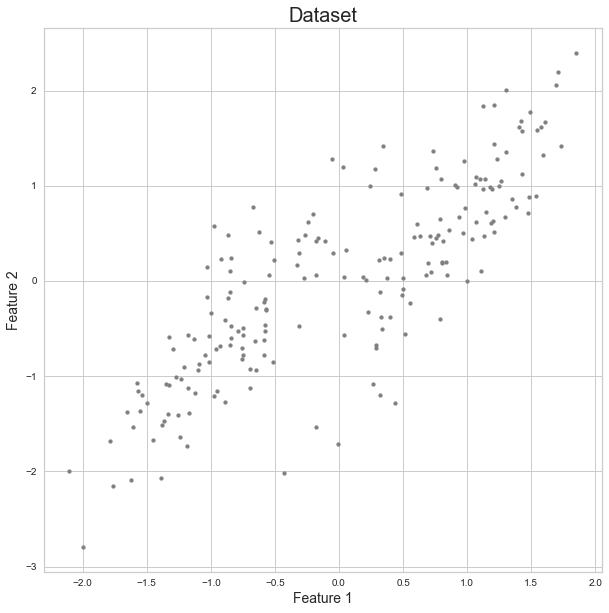

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(d1.iloc[:,0],d1.iloc[:,1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

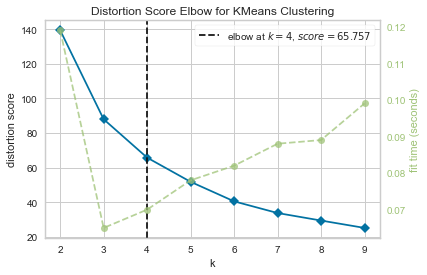

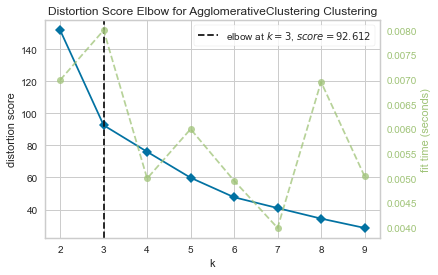

In [11]:
elbowMethod(d1)


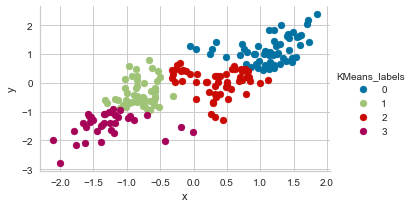

In [12]:
# grab only clustered data points
kmeans(d1,4)

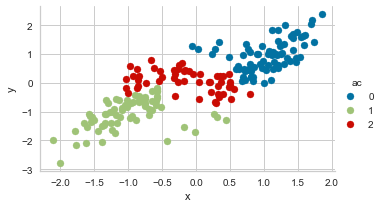

In [13]:
hierarchial_clustering(d1,3)

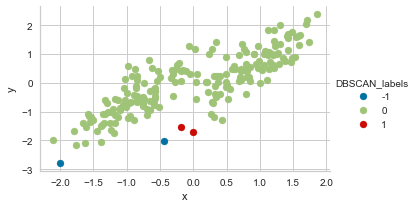

In [14]:
dbscan(d1, 0.5, 2)

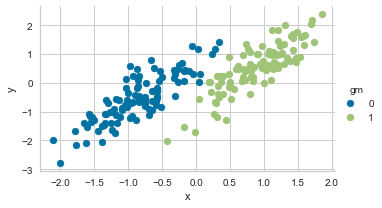

In [15]:
gmm(d1,2)

In [16]:
print("kmeans score: ",calc_score(d1,'KMeans_labels')) 
print("Hierarchial clusterig score: ",calc_score(d1,'ac')) 
print("dbscan score: ",calc_score(d1,'DBSCAN_labels')) 
n_noise = list(d1['DBSCAN_labels']).count(-1)
print("noise in dbscan ",n_noise)
print("gaussian mixture: ",calc_score(d1,'gm')) 


kmeans score:  0.562114102735962
Hierarchial clusterig score:  0.44749248561677407
dbscan score:  0.146722637302911
noise in dbscan  2
gaussian mixture:  0.3725280063537618


In [17]:
bestScore(calc_score(d1,'KMeans_labels'),calc_score(d1,'ac'),calc_score(d1,'DBSCAN_labels'),calc_score(d1,'gm'))

kmeans is the best model for this dataset


## Dataset 2

In [18]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

d2.head()

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


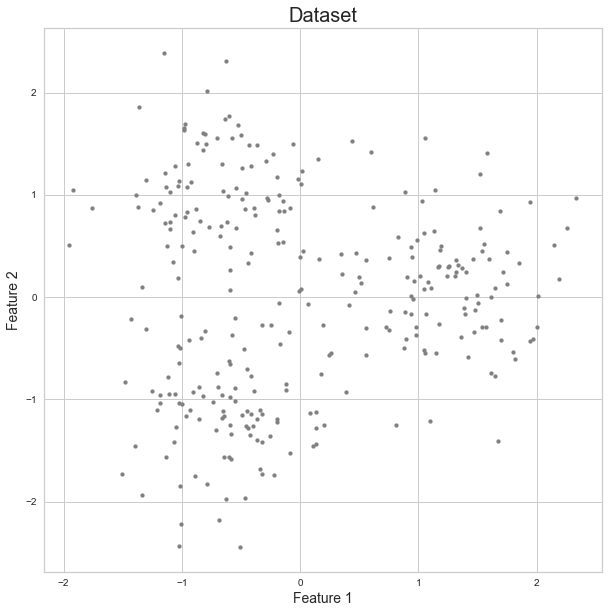

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(d2.iloc[:,0],d2.iloc[:,1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

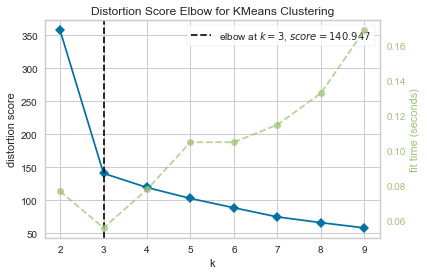

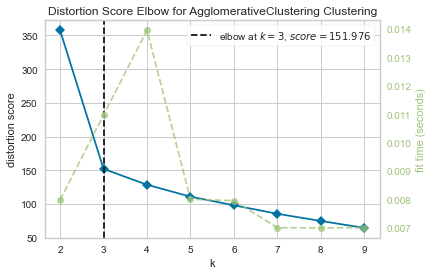

In [20]:
elbowMethod(d2)


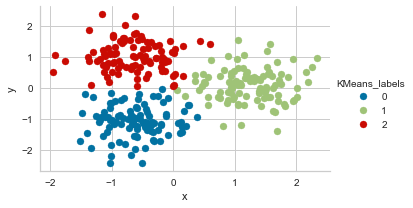

In [21]:
kmeans(d2,3)

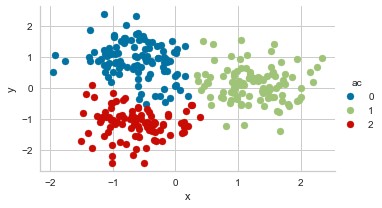

In [22]:
hierarchial_clustering(d2,3)

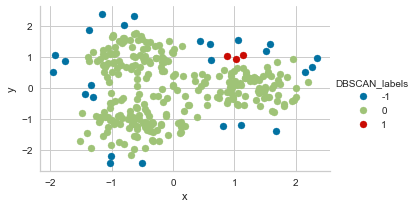

In [23]:
dbscan(d2,0.3,3)

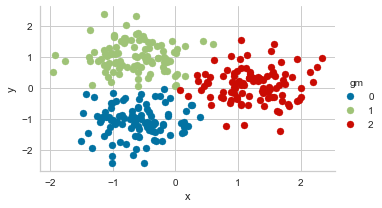

In [24]:
gmm(d2,3)

In [25]:
print("kmeans score: ",calc_score(d2,'KMeans_labels')) 
print("Hierarchial clusterig score: ",calc_score(d2,'ac')) 
print("dbscan score: ",calc_score(d2,'DBSCAN_labels')) 
n_noise = list(d2['DBSCAN_labels']).count(-1)
print("noise in dbscan ",n_noise)
print("gaussian mixture: ",calc_score(d2,'gm')) 

kmeans score:  0.6646550252715862
Hierarchial clusterig score:  0.6439824690569873
dbscan score:  0.00012961118475072198
noise in dbscan  25
gaussian mixture:  0.6646550252715862


In [26]:
bestScore(calc_score(d2,'KMeans_labels'),calc_score(d2,'ac'),calc_score(d2,'DBSCAN_labels'),calc_score(d2,'gm'))

kmeans is the best model for this dataset
gaussian mixture is the best model for this dataset


## Dataset 3

In [27]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")



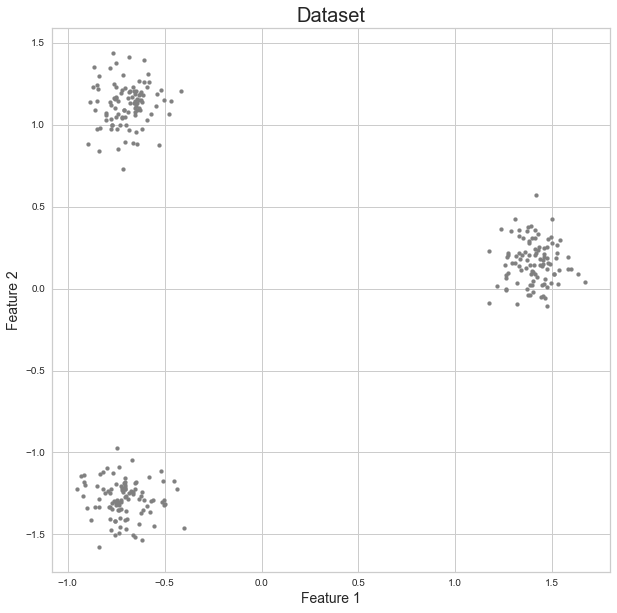

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(d3.iloc[:,0],d3.iloc[:,1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

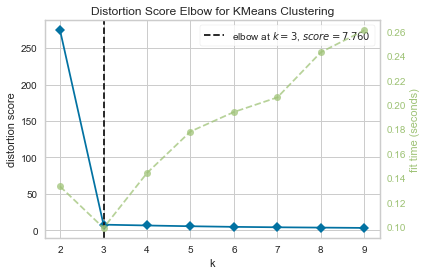

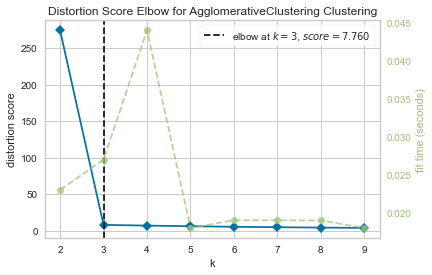

In [29]:
elbowMethod(d3)



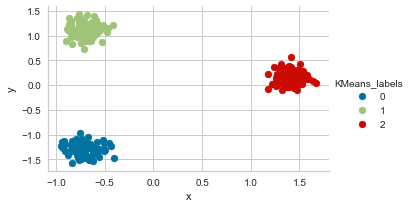

In [30]:
kmeans(d3,3)

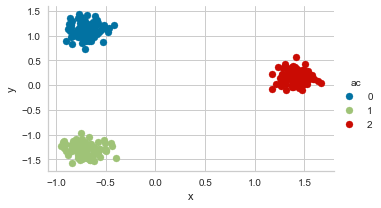

In [31]:
hierarchial_clustering(d3,3)

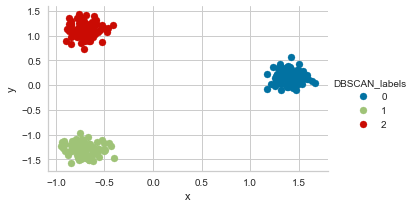

In [32]:
dbscan(d3,0.5,3)

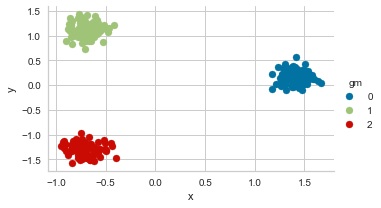

In [33]:
gmm(d3,3)

In [34]:
print("kmeans score: ",calc_score(d3,'KMeans_labels')) 
print("Hierarchial clusterig score: ",calc_score(d3,'ac')) 
print("dbscan score: ",calc_score(d3,'DBSCAN_labels')) 
n_noise = list(d3['DBSCAN_labels']).count(-1)
print("noise in dbscan ",n_noise)
print("gaussian mixture: ",calc_score(d3,'gm')) 

kmeans score:  0.9400386967284057
Hierarchial clusterig score:  0.9400386967284057
dbscan score:  0.9400386967284057
noise in dbscan  0
gaussian mixture:  0.9400386967284057


In [35]:
bestScore(calc_score(d3,'KMeans_labels'),calc_score(d3,'ac'),calc_score(d3,'DBSCAN_labels'),calc_score(d3,'gm'))

kmeans is the best model for this dataset
hierarchial clustering is the best model for this dataset
dbscan is the best model for this dataset
gaussian mixture is the best model for this dataset


## Dataset 4

In [36]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")


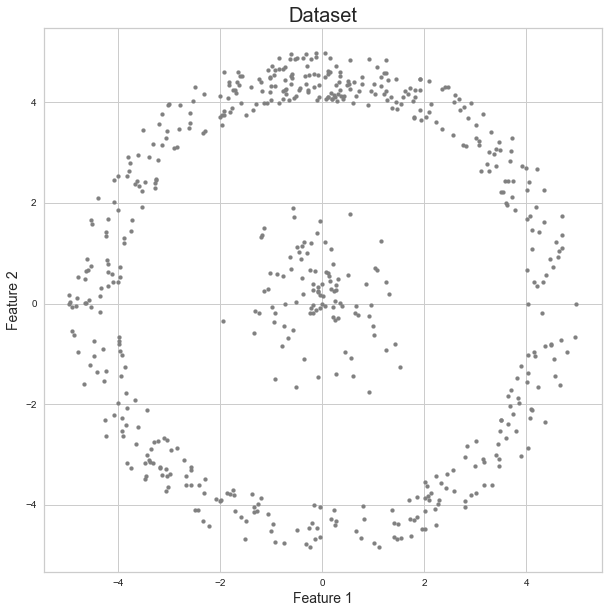

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(d4.iloc[:,0],d4.iloc[:,1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

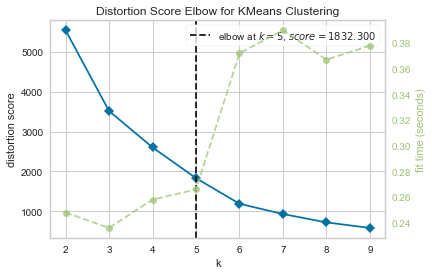

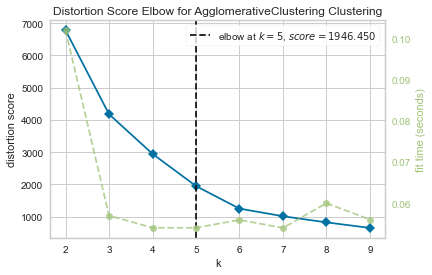

In [38]:
elbowMethod(d4)


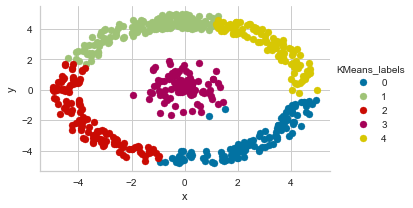

In [39]:
kmeans(d4,5)

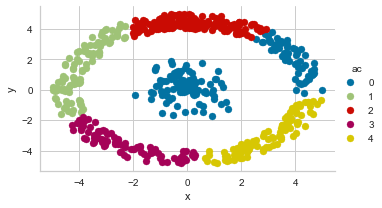

In [40]:
hierarchial_clustering(d4,5)

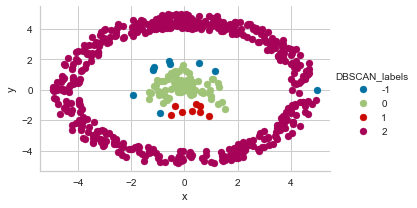

In [41]:
dbscan(d4,0.5,4)

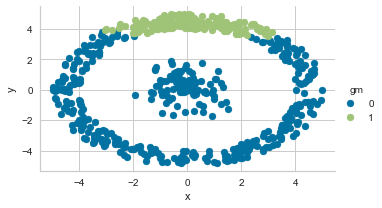

In [42]:
gmm(d4,2)

In [43]:
print("kmeans score: ",calc_score(d4,'KMeans_labels')) 
print("Hierarchial clusterig score: ",calc_score(d4,'ac')) 
print("dbscan score: ",calc_score(d4,'DBSCAN_labels')) 
n_noise = list(d4['DBSCAN_labels']).count(-1)
print("noise in dbscan ",n_noise)
print("gaussian mixture: ",calc_score(d4,'gm')) 


kmeans score:  0.5705671542482601
Hierarchial clusterig score:  0.5079800623567319
dbscan score:  -0.02089340711467853
noise in dbscan  10
gaussian mixture:  0.2798143817785969


In [44]:
bestScore(calc_score(d4,'KMeans_labels'),calc_score(d4,'ac'),calc_score(d4,'DBSCAN_labels'),calc_score(d1,'gm'))

kmeans is the best model for this dataset


### Compare

## Dataset 5

In [45]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")


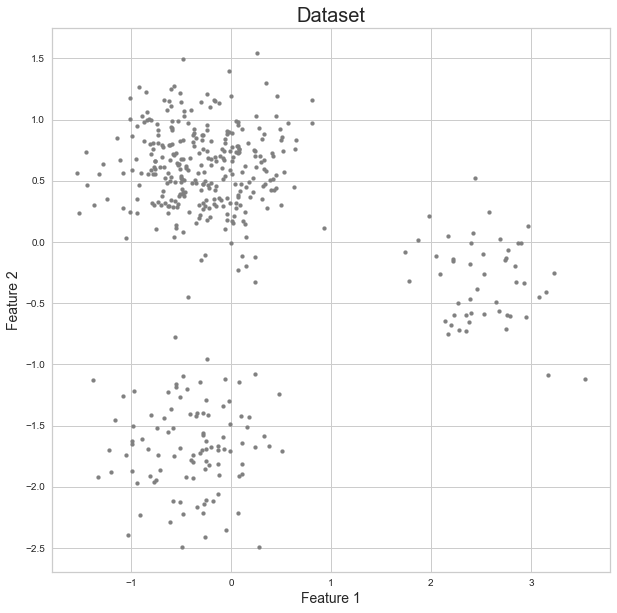

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(d5.iloc[:,0],d5.iloc[:,1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

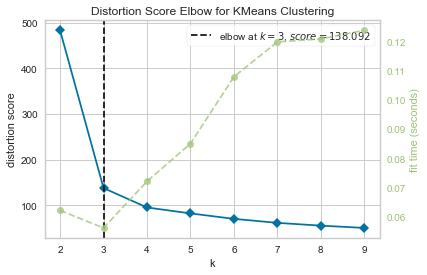

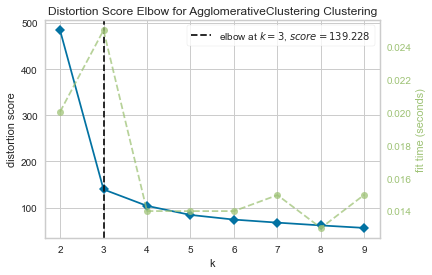

In [47]:
elbowMethod(d5)


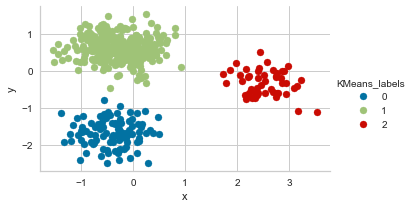

In [48]:
kmeans(d5,3)

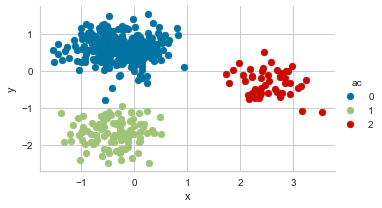

In [49]:
hierarchial_clustering(d5,3)

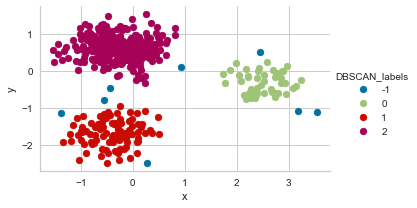

In [50]:
dbscan(d5,0.3,3)

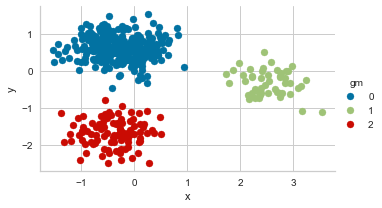

In [51]:
gmm(d5,3)

In [52]:
print("kmeans score: ",calc_score(d5,'KMeans_labels')) 
print("Hierarchial clusterig score: ",calc_score(d5,'ac')) 
print("dbscan score: ",calc_score(d5,'DBSCAN_labels')) 
n_noise = list(d5['DBSCAN_labels']).count(-1)
print("noise in dbscan ",n_noise)
print("gaussian mixture: ",calc_score(d5,'gm')) 

kmeans score:  0.7987474424530933
Hierarchial clusterig score:  0.7958359662690555
dbscan score:  0.7868112435611876
noise in dbscan  8
gaussian mixture:  0.7987474424530933


In [53]:
bestScore(calc_score(d5,'KMeans_labels'),calc_score(d5,'ac'),calc_score(d5,'DBSCAN_labels'),calc_score(d5,'gm'))

kmeans is the best model for this dataset
gaussian mixture is the best model for this dataset


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

In [54]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")


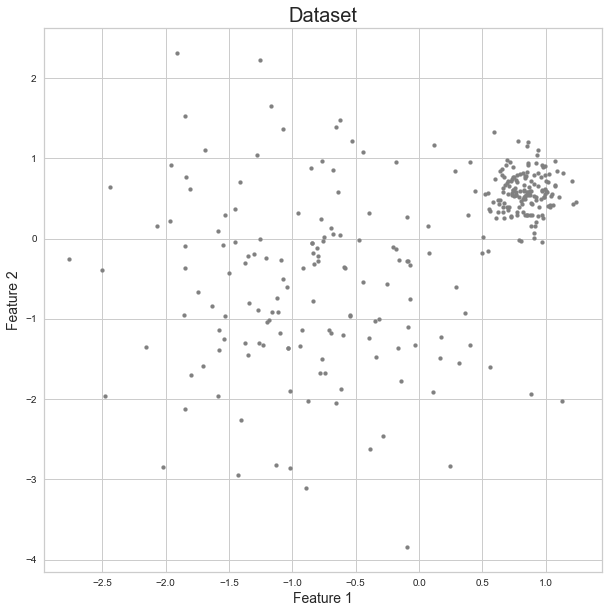

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(d6.iloc[:,0],d6.iloc[:,1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

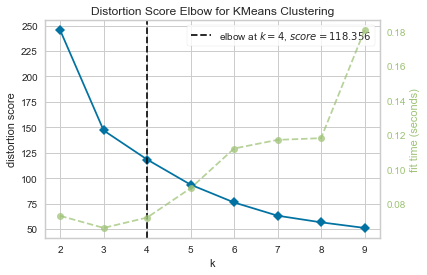

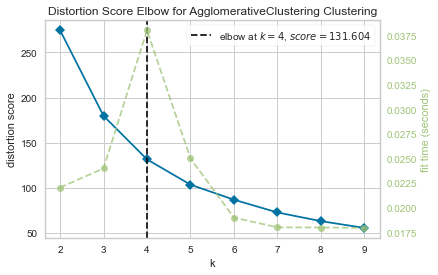

In [56]:
elbowMethod(d6)


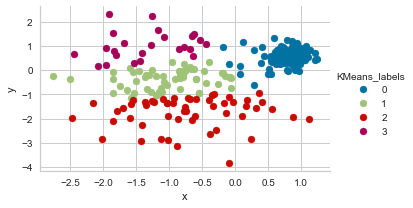

In [57]:
# we ask for 4 nearest, because the data point it self (distance = 0) is included
kmeans(d6,4)

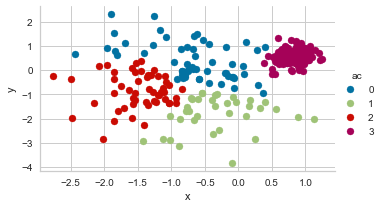

In [58]:
# sort the distances
hierarchial_clustering(d6,4)

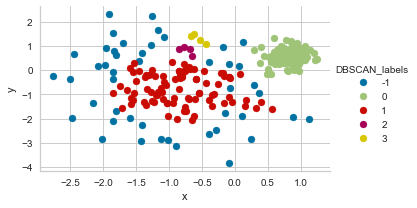

In [59]:
#plot the distances
dbscan(d6,0.3,4)

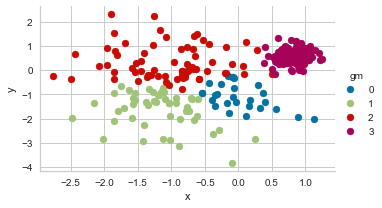

In [60]:
gmm(d6,4)

In [61]:
print("kmeans score: ",calc_score(d6,'KMeans_labels')) 
print("Hierarchial clusterig score: ",calc_score(d6,'ac')) 
print("dbscan score: ",calc_score(d6,'DBSCAN_labels')) 
n_noise = list(d6['DBSCAN_labels']).count(-1)
print("noise in dbscan ",n_noise)
print("gaussian mixture: ",calc_score(d6,'gm')) 

kmeans score:  0.5729941446909977
Hierarchial clusterig score:  0.5975268893695812
dbscan score:  0.5946654243310932
noise in dbscan  46
gaussian mixture:  0.5761040740928491


In [62]:
bestScore(calc_score(d6,'KMeans_labels'),calc_score(d6,'ac'),calc_score(d6,'DBSCAN_labels'),calc_score(d6,'gm'))

hierarchial clustering is the best model for this dataset
